<a href="https://colab.research.google.com/github/griffinsspike/LoLWR/blob/main/LolWR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJE TEMELİNDE LEAGUE OF LEGENDS OYUNUNDAKİ KARAKTERLERDEN HANGİLERİNİN SİZE UYGUN OLDUĞUNU GİRDİĞİNİZ GİRDİLERDEN ANLAMAYA ÇALIŞAN VE SİZE KAZANMA ORANINA, OYNAMAK İSTEDİĞİNİZ ROLE GÖRE FARKLI FARKLI KATEGORİLERDE ÖNERİ SUNAN BİR PROJEDİR.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt;

**VERİ MANİPÜLASYONU**



In [ ]:
df = pd.read_csv("lol_champions_current.csv", sep = ";")

In [ ]:
df['winrate'] = df['winrate'].str.rstrip('%').astype('float') / 100

In [ ]:
df.head()

,id,name,popularity,winrate,banrate,averageKDA,attack,defense,magic,difficulty,role,rangetype,tags,partype
0,Aatrox,Aatrox,10.7%,0.495,17.3%,6.1/6.1/5.3,8,4,3,4,Top,Melee,"Fighter,Tank",Blood Well
1,Ahri,Ahri,8.5%,0.510,4.4%,6.2/5.3/7.6,3,4,8,5,Middle,Ranged,"Mage,Assassin",Mana
2,Akali,Akali,7.2%,0.493,9.3%,8.4/5.8/4.8,5,3,8,7,"Top,Middle",Melee,Assassin,Energy
3,Akshan,Akshan,1.7%,0.486,1.9%,8.5/6.5/5.5,8,3,0,7,Middle,Ranged,"Marksman,Assassin",Mana
4,Alistar,Alistar,5.0%,0.490,2.0%,1.9/6.4/13.8,6,9,5,7,Support,Melee,"Tank,Support",Mana


In [ ]:
df.isnull().sum()

,0
id,0
name,0
popularity,0
winrate,0
banrate,0
averageKDA,0
attack,0
defense,0
magic,0
difficulty,0


In [ ]:
df[df.isnull().any(axis=1)]

,id,name,popularity,winrate,banrate,averageKDA,attack,defense,magic,difficulty,role,rangetype,tags,partype


In [ ]:
df.nunique()

,0
id,168
name,168
popularity,90
winrate,55
banrate,96
averageKDA,166
attack,11
defense,10
magic,11
difficulty,10


In [ ]:
df["difficulty"]

,difficulty
0,4
1,5
2,7
3,7
4,7
...,...
163,4
164,4
165,6
166,5


In [ ]:
df.head()

,id,name,popularity,winrate,banrate,averageKDA,attack,defense,magic,difficulty,role,rangetype,tags,partype
0,Aatrox,Aatrox,10.7%,0.495,17.3%,6.1/6.1/5.3,8,4,3,4,Top,Melee,"Fighter,Tank",Blood Well
1,Ahri,Ahri,8.5%,0.510,4.4%,6.2/5.3/7.6,3,4,8,5,Middle,Ranged,"Mage,Assassin",Mana
2,Akali,Akali,7.2%,0.493,9.3%,8.4/5.8/4.8,5,3,8,7,"Top,Middle",Melee,Assassin,Energy
3,Akshan,Akshan,1.7%,0.486,1.9%,8.5/6.5/5.5,8,3,0,7,Middle,Ranged,"Marksman,Assassin",Mana
4,Alistar,Alistar,5.0%,0.490,2.0%,1.9/6.4/13.8,6,9,5,7,Support,Melee,"Tank,Support",Mana


In [ ]:
df[['defense', 'winrate']].isna().sum()

,0
defense,0
winrate,0


**VERİ GÖRSELLEŞTİRME**

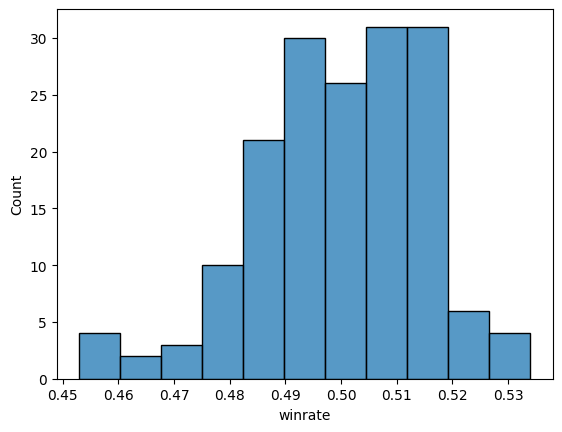

In [ ]:
sns.histplot(df['winrate'])
plt.show()

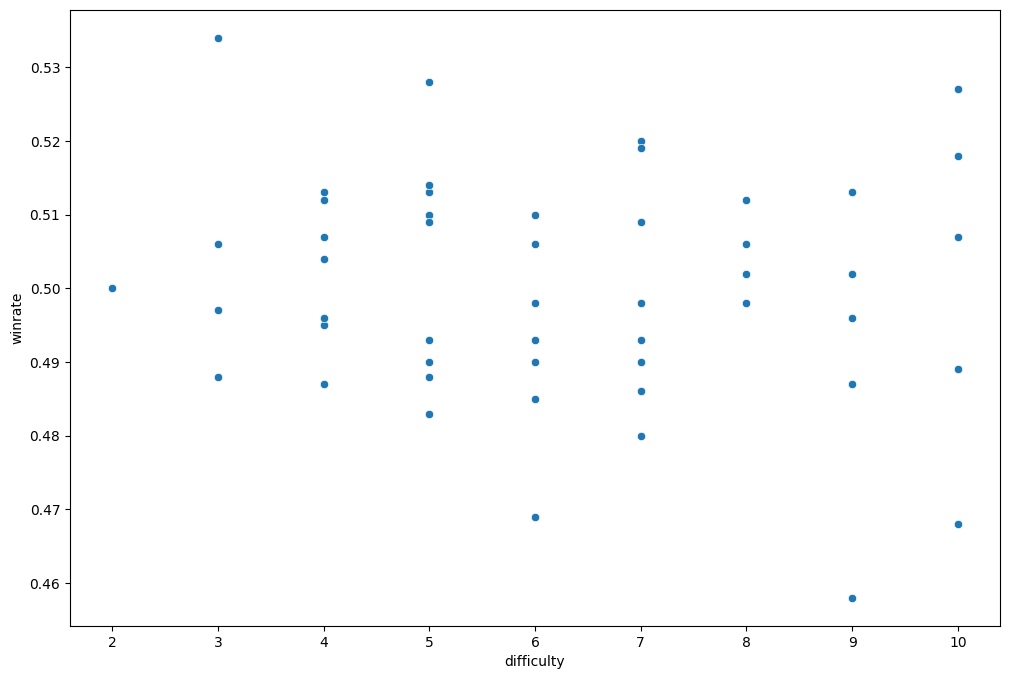

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='difficulty', y='winrate', data=df.head(50), ax=ax)
plt.show()

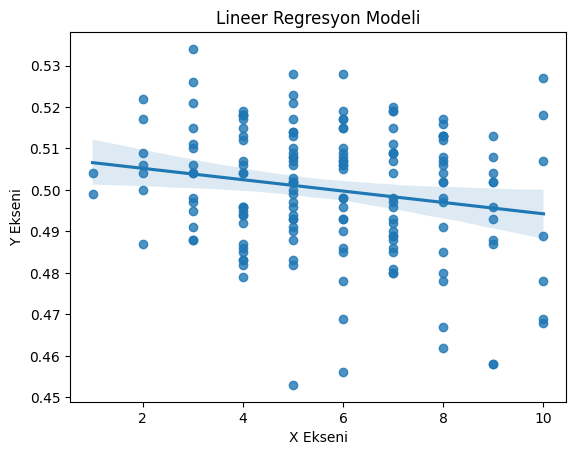

In [ ]:
# Scatterplot ve regresyon çizgisi
sns.regplot(x=df['difficulty'], y=df['winrate'], data=df)

plt.title('Lineer Regresyon Modeli')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')

plt.show()

In [ ]:
df['role'] = df['role'].str.replace(',', '/')

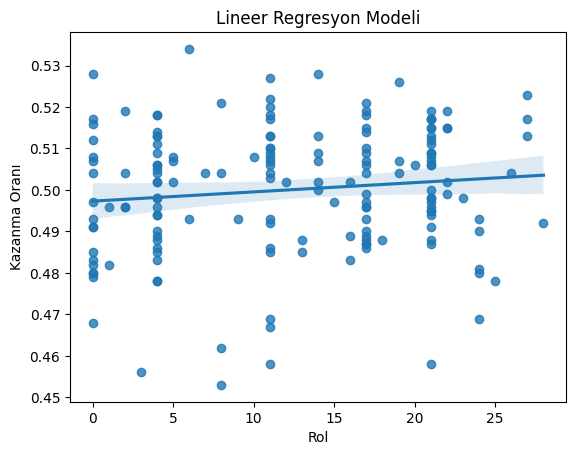

Role Mapping:
Bottom: 0
Bottom/Middle: 1
Bottom/Support: 2
Bottom/Top/Middle: 3
Jungle: 4
Jungle/Middle: 5
Jungle/Support: 6
Jungle/Support/Middle: 7
Jungle/Top: 8
Jungle/Top/Middle: 9
Jungle/Top/Support: 10
Middle: 11
Middle/Bottom/Top: 12
Middle/Jungle: 13
Middle/Support: 14
Middle/Support/Top: 15
Middle/Top: 16
Support: 17
Support/Jungle: 18
Support/Middle: 19
Support/Top/Middle: 20
Top: 21
Top/Jungle: 22
Top/Jungle/Support: 23
Top/Middle: 24
Top/Middle/Bottom: 25
Top/Middle/Support: 26
Top/Support: 27
Top/Support/Jungle/Middle: 28


In [ ]:
# Rolleri sayısal olarak gösterelim
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['role_encoded'] = encoder.fit_transform(df['role'])

# Kodlanmış rol verilerinin regresyon çizgisi
sns.regplot(x=df['role_encoded'], y=df['winrate'], data=df)

# Grafik başlığını ve eksen etiketlerini ayarlayalım
plt.title('Lineer Regresyon Modeli')
plt.xlabel('Rol')
plt.ylabel('Kazanma Oranı')

plt.show()

# Rol ve kodlanmış değerleri eşleştiririz
role_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Eşleştirmeyi yazdırıyoruz
print("Role Mapping:")
for role, encoded_value in role_mapping.items():
    print(f"{role}: {encoded_value}")

In [ ]:
role_counts = df['role'].value_counts()
role_counts

,count
role,
Top,27
Jungle,26
Middle,22
Support,21
Bottom,18
Middle/Support,6
Top/Middle,5
Top/Jungle,5
Jungle/Top,4


In [ ]:
df['primary_role'] = df['role'].str.split('/').str[0]

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U6'), dtype('float64')) -> None

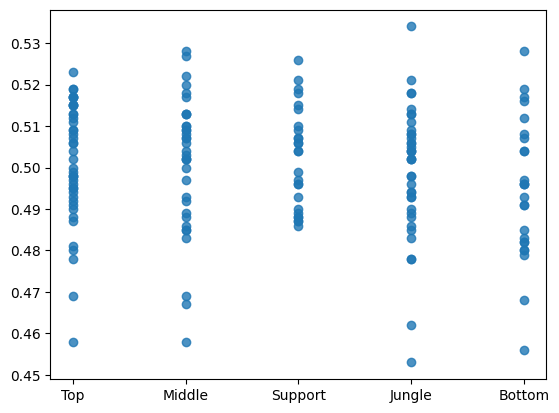

In [ ]:
sns.regplot(x=df['primary_role'], y=df['winrate'], data=df)

# Grafik başlığını ve eksen etiketlerini ayarla
plt.title('Primary Role ve Kazanma Oranı')
plt.xlabel('Primary Role')
plt.ylabel('Kazanma Oranı')

# Grafiği göster
plt.show()

#Aşağıda bir hata veriyor fakat bu hata bizim işleyişimize engel olmuyor. Grafik olması gerektiği gibi

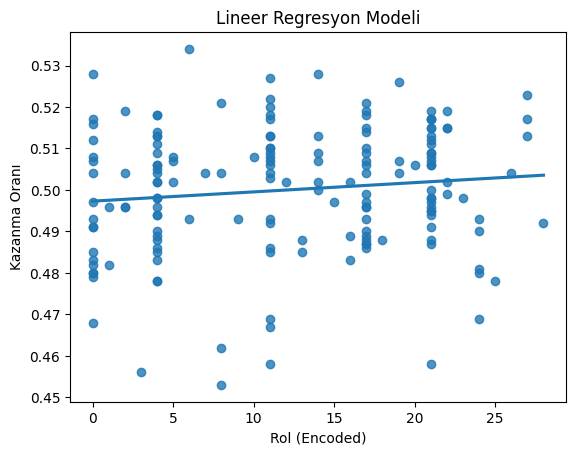

In [ ]:
# Label Encoding
encoder = LabelEncoder()
df['primary_role'] = encoder.fit_transform(df['role'])

# Regresyon grafiği
sns.regplot(x=df['primary_role'], y=df['winrate'], ci=None)

# Grafik başlığı ve etiketler
plt.title('Lineer Regresyon Modeli')
plt.xlabel('Rol (Encoded)')
plt.ylabel('Kazanma Oranı')
plt.show()

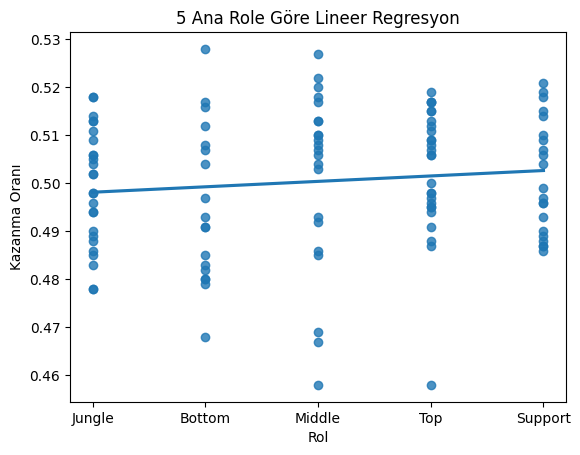

In [ ]:
# İlk rolü görmek için yaptığımız dönüşüm
df['primary_role'] = df['role'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

# Sadece 5 ana rolü dikkate alalım
valid_roles = ['Jungle', 'Bottom', 'Middle', 'Top', 'Support']
df = df[df['primary_role'].isin(valid_roles)]

# Primary_role ve winrate'e göre lineer regresyon grafiği
sns.regplot(x=pd.Categorical(df['primary_role'], categories=valid_roles, ordered=True).codes,
            y=df['winrate'],
            ci=None)

plt.xticks(range(len(valid_roles)), valid_roles)
plt.title('5 Ana Role Göre Lineer Regresyon')
plt.xlabel('Rol')
plt.ylabel('Kazanma Oranı')
plt.show()

**Verilen koridor ve tag bilgisine göre kullanıcıya en yüksek kazanma oranını sunuyoruz**

In [ ]:
# Kullanıcıdan giriş alma
user_role = input("Hangi rolde oynamayı tercih edersiniz? (örnek: Jungle, Top, Middle, Bottom, Support): ").strip()
user_playstyle = input("Oyun tarzınızı seçin (örnek: Melee, Ranged): ").strip()

# Kullanıcı girdilerine göre veri setini filtreleme
filtered_df = df[df['role'].str.contains(user_role, case=False, na=False)]
filtered_df = filtered_df[filtered_df['rangetype'].str.contains(user_playstyle, case=False, na=False)]

# Kazanma oranına göre en yüksek 5 şampiyonu seçme
top_champions = filtered_df.sort_values(by='winrate', ascending=False).head(5)

# Sonuçları kullanıcıya gösterme
if not top_champions.empty:
    print("\nEn ideal şampiyonlar:")
    print(top_champions[['name', 'role', 'winrate']])
else:
    print("Maalesef, belirttiğiniz kriterlere uygun bir şampiyon bulunamadı.")

Hangi rolde oynamayı tercih edersiniz? (örnek: Jungle, Top, Middle, Bottom, Support): Support
Oyun tarzınızı seçin (örnek: Melee, Ranged): Melee

En ideal şampiyonlar:
        name     role  winrate
104     Rell  Support    0.510
17     Braum  Support    0.506
70     Leona  Support    0.496
101    Rakan  Support    0.493
4    Alistar  Support    0.490


**Karakter özelliklerine göre koridor tahmin etme**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Veri setini yükleme
df = pd.read_csv("lol_champions_current.csv", delimiter=';')

# Gerekli sütunları seçme
features = ['attack', 'defense', 'magic']
target = 'role'

# Eksik verileri kaldırma
df = df.dropna(subset=features + [target])

# Hedef değişkeni kategorik kodlama
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target].str.split(',').str[0])  # İlk rolü seçiyoruz

# Veri setini bağımlı ve bağımsız değişkenlere ayırma
X = df[features]
y = df[target]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier modeli oluşturma
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Test setinde tahmin
y_pred = model.predict(X_test)

# Kullanıcıdan giriş alarak tahmin yapma
print("\nKarakter özelliklerini girin:")
attack = int(input("Attack değeri: "))
defense = int(input("Defense değeri: "))
magic = int(input("Magic değeri: "))

# Kullanıcı girdilerini modele verip tahmini yapma
prediction = model.predict([[attack, defense, magic]])
predicted_role = label_encoder.inverse_transform(prediction)
print(f"Bu özelliklere sahip karakterin tahmini rolü: {predicted_role[0]}")



Karakter özelliklerini girin:
Attack değeri: 8
Defense değeri: 6
Magic değeri: 0
Bu özelliklere sahip karakterin tahmini rolü: Top


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**KARAKTER ÖZELLİKLERİNE GÖRE İLK 2 ROLÜ YÜZDELİK ORANLA TAHMİN ETME**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Veri setini yükleme
df = pd.read_csv("lol_champions_current.csv", delimiter=';')

# Gerekli sütunları seçme
features = ['attack', 'defense', 'magic']
target = 'role'

# Eksik verileri kaldırma
df = df.dropna(subset=features + [target])

# Hedef değişkeni kategorik kodlama
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target].str.split(',').str[0])  # İlk rolü seçiyoruz

# Veri setini bağımlı ve bağımsız değişkenlere ayırma
X = df[features]
y = df[target]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier modeli oluşturma
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Test setinde tahmin
y_pred = model.predict(X_test)

# Kullanıcıdan giriş alarak tahmin yapma
print("\nKarakter özelliklerini girin:")
attack = int(input("Attack değeri: "))
defense = int(input("Defense değeri: "))
magic = int(input("Magic değeri: "))

# Kullanıcı girdilerini modele verip tahmin yapma
probabilities = model.predict_proba([[attack, defense, magic]])[0]  # Olasılıkları al
sorted_indices = probabilities.argsort()[::-1]  # Olasılıkları büyükten küçüğe sırala

# İlk iki sınıfın yüzdelerini ve adlarını al
top1_index = sorted_indices[0]
top2_index = sorted_indices[1]
top1_role = label_encoder.inverse_transform([top1_index])[0]
top2_role = label_encoder.inverse_transform([top2_index])[0]
top1_prob = probabilities[top1_index] * 100
top2_prob = probabilities[top2_index] * 100

# Sonuçları gösterme
print(f"\nBu özelliklere sahip karakterin tahmin edilen ilk iki rolü:")
print(f"{top1_role}: %{top1_prob:.2f}")
print(f"{top2_role}: %{top2_prob:.2f}")



Karakter özelliklerini girin:
Attack değeri: 8
Defense değeri: 6
Magic değeri: 0

Bu özelliklere sahip karakterin tahmin edilen ilk iki rolü:
Top: %52.78
Jungle: %23.33


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Karakterlerin değerlerini verip hangi tag'a sahip olduğunu bulmaya çalışan makine öğrenmesi algoritması**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pandas as pd

# Veri setini yükleme
df = pd.read_csv("lol_champions_current.csv", delimiter=';')

# Gerekli sütunları seçme
features = ['attack', 'defense', 'magic']
target = 'tags'  # Şampiyonların tag bilgisi

# Eksik verileri kaldırma
df = df.dropna(subset=features + [target])

# Hedef değişkeni kategorik kodlama
df[target] = df[target].astype(str)  # Tüm değerleri string'e çevir
df[target] = df[target].str.split('.').str[0]  # İlk tag'i seçiyoruz (örneğin "Assassin")
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Veri setini bağımlı ve bağımsız değişkenlere ayırma
X = df[features]
y = df[target]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier modeli oluşturma
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Test setinde tahmin
y_pred = model.predict(X_test)

# Kullanıcıdan giriş alarak tahmin yapma
print("\nKarakter özelliklerini girin:")
attack = int(input("Attack değeri: "))
defense = int(input("Defense değeri: "))
magic = int(input("Magic değeri: "))

# Kullanıcı girdilerini modele verip tahmin yapma
user_input = [[attack, defense, magic]]
prediction = model.predict(user_input)
predicted_tag = label_encoder.inverse_transform(prediction)[0]
print(f"Bu özelliklere sahip şampiyonun tahmin edilen tag'i: {predicted_tag}")



Karakter özelliklerini girin:
Attack değeri: 9
Defense değeri: 5
Magic değeri: 0
Bu özelliklere sahip şampiyonun tahmin edilen tag'i: Fighter,Tank


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**KDA'ya göre kazanma oranı**

In [ ]:
import re

def kazanma_orani_hesapla(kda):
    """
    Verilen KDA değerine göre %45 ile %55 arasında bir kazanma oranı hesaplar.

    Args:
      kda: KDA değeri (örnek: "13/3/2").

    Returns:
      Kazanma oranı (yüzde olarak).
    """
    try:
        # KDA değerini ayrıştır
        k, d, a = map(int, re.findall(r'\d+', kda))

        # KDA oranını hesapla
        kda_oran = (k + a) / d

        # KDA oranını 0-10 arasına ölçeklendir
        olceklendirilmis_oran = max(0, min(10, kda_oran))

        # Kazanma oranını hesapla
        kazanma_oran = 45 + olceklendirilmis_oran

        return kazanma_oran

    except ValueError:
        print("Geçersiz KDA formatı. Lütfen 'kill/death/assist' formatında girin.")
        return None

# Kullanıcıdan KDA değerini girmesini iste
kda_degeri = input("KDA değerini girin (Örnek: 13/3/2): ")

# Kazanma oranını hesapla ve yazdır
kazanma_oran = kazanma_orani_hesapla(kda_degeri)
if kazanma_oran is not None:
    print(f"Girdiğiniz KDA değeri: {kda_degeri}")
    print(f"Kazanma ihtimaliniz: %{kazanma_oran:.0f}")

KDA değerini girin (Örnek: 13/3/2): 11/2/2
Girdiğiniz KDA değeri: 11/2/2
Kazanma ihtimaliniz: %52


**Hocam tüm projenin odaklandığı yer burası. Yukarıdaki bütün işlemleri buraya gelebilmek için yaptık**

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Veri setini yükleme
df = pd.read_csv("lol_champions_current.csv", delimiter=';')

# averageKDA sütununu temizle ve sayısal hale getir
def calculate_kda(x):
    x = re.sub(r'[^0-9.]', '', x)
    if x:
        numbers = [float(i) for i in x.split('.')]
        if len(numbers) >= 3:
            return (numbers[0] + numbers[-1]) / numbers[1]
    return 0

df['averageKDA_numeric'] = df['averageKDA'].apply(calculate_kda)

# winrate sütununu temizle ve sayısal hale getir
df['winrate_numeric'] = df['winrate'].str.replace('%', '', regex=False).astype(float)

# role ve tags sütunlarını birleştir
df['role_tags'] = df['role'] + '_' + df['tags']

# Sadece gerekli sütunları içeren yeni bir DataFrame oluştur
df_processed = df[['winrate_numeric', 'role_tags', 'difficulty', 'averageKDA_numeric']].copy()

# One-hot encoding uygula
df_processed = pd.get_dummies(df_processed, columns=['role_tags'])

# Bağımsız ve bağımlı değişkenleri ayarla
X = df_processed.drop('winrate_numeric', axis=1)
y = df_processed['winrate_numeric']

# Verileri eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Doğrusal Regresyon modelini oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

def winrate_tahmin_et():
    """
    Kullanıcıdan girdi alarak winrate tahmin eder.
    """

    # Rol bilgisini al
    role = input("Hangi rolde oynuyorsunuz? (Örnek: Top, Jungle, Mid, Support, Bottom): ")

    # Tag bilgisini al
    tags = input("Hangi tag'da karakter oynuyorsunuz? (Örnek: Fighter, Mage, Assassin, Tank, Support, Marksman): ")

    # Difficulty bilgisini al
    while True:
        try:
            difficulty = int(input("Karakterin zorluk seviyesi nedir? (1-10 arası): "))
            if 1 <= difficulty <= 10:
                break
            else:
                print("Geçersiz zorluk seviyesi. Lütfen 1-10 arası bir sayı girin.")
        except ValueError:
            print("Geçersiz zorluk seviyesi. Lütfen bir sayı girin.")

    # KDA bilgisini al
    kda = input("KDA değerini girin (Örnek: 13/3/2): ")

    # One-hot encoding için girdi verilerini hazırla
    role_tags = role + '_' + tags
    input_data = pd.DataFrame({'difficulty': [difficulty], 'averageKDA_numeric': [calculate_kda(kda)]})
    input_data['role_tags'] = role_tags
    input_data = pd.get_dummies(input_data, columns=['role_tags'])

    # Eksik sütunları ekle (eğitim verilerindeki tüm role_tags kombinasyonları)
    missing_cols = set(X_train.columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0
    input_data = input_data[X_train.columns]

    # Winrate tahmin et
    winrate = model.predict(input_data)[0]

    print(f"Girdiğiniz bilgiler: Rol: {role}, Tag: {tags}, Zorluk: {difficulty}, KDA: {kda}")
    print(f"Tahmini kazanma oranınız: %{winrate:.2f}")

# Fonksiyonu çağır
winrate_tahmin_et()

Hangi rolde oynuyorsunuz? (Örnek: Top, Jungle, Mid, Support, Bottom): Top
Hangi tag'da karakter oynuyorsunuz? (Örnek: Fighter, Mage, Assassin, Tank, Support, Marksman): Fighter
Karakterin zorluk seviyesi nedir? (1-10 arası): 1
KDA değerini girin (Örnek: 13/3/2): 3/7/1
Girdiğiniz bilgiler: Rol: Top, Tag: Fighter, Zorluk: 1, KDA: 3/7/1
Tahmini kazanma oranınız: %48.59
